In [ ]:
!pip install gensim
!pip install python-Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# imports pytorch
import torch

In [1]:
import gensim
import pandas as pd

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/jd_source_c_2_filtered_020622.csv')
df

,Unnamed: 0,job_title,skill,job_desc,Industry,Function,Role,Education
0,54,Software Engineer - Graduate Trainee,java\n.net\nSoftware programming\nperl\npython,Requirements\nAt least 6 months of Experience ...,IT/ Computers - Software,IT,Software Engineer/ Programmer,Diploma\nNon Degree Tertiary
1,62,Software Engineer/ Data Engineer – Permanent P...,Phython\nScala\nMatlab\nExcel\nHTML\nCSS,Software Engineer/ Data Engineer – Permanent P...,IT/ Computers - Software,IT,•\nSoftware Engineer/ Programmer\n•\nDatabase ...,Bachelors\nDegree\nMasters\nPost Graduate
2,116,"Senior Software Engineer, Singapore",.net java salesforce software engineer,Senior Software Engineers deliver high-quality...,(Candidates authorized to work in the above me...,IT/ Computers - Software,IT,Software Engineer/ Programmer
3,203,Security Software Engineer,Cyber security\nSoftware Development\nTechnica...,Please note: Due to the security nature of the...,IT/ Computers - Software,IT,•\nSoftware Engineer/ Programmer\n•\nSystem An...,Bachelors\nDegree
4,207,Junior Software Engineer,java\n.net\nSoftware programming\nperl\npython,"Prefer 6 months of Experience , Open to consi...",IT/ Computers - Software,IT,Software Engineer/ Programmer,Diploma\nNon Degree Tertiary
...,...,...,...,...,...,...,...,...
113,5201,Software Engineer- Java Developer,Java\nJEE\nESB\nEJB,"•\tRecognised degree in Computer Science, IT o...",IT/ Computers - Software,IT,Software Engineer/ Programmer,NaN
114,5210,Software Engineer (Java),Java\njsp\nspring\nhibernate\nUNIX,In charge of development and documentation of ...,Banking/ Financial Services,IT,•\nSoftware Engineer/ Programmer\n•\nTeam Lead...,Bachelors\nDegree
115,5247,"Software Engineer, Full Stack (Node.JS, Python...",Node.JS\nPython and REACT,Do you enjoy building great products using Nod...,IT/ Computers - Software,IT,Software Engineer/ Programmer,Bachelors\nDegree
116,5277,Software Engineer,Java EE\nJAVA Enterprise\nJava Enterprise\nJav...,Job Requirements:\nSoftware developer that is ...,•\nBanking/ Financial Services\n•\nIT/ Compute...,IT,•\nSoftware Engineer/ Programmer\n•\nTeam Lead...,Bachelors\nDegree\nMasters\nPost Graduate\nPhD...


In [ ]:
df.shape

(118, 8)

In [5]:
import spacy
from collections import Counter
from string import punctuation
nlp=spacy.load('en_core_web_sm')

In [6]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
df['job_desc_clean'] = df['job_desc'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
mask = df['job_desc_clean'].str.contains('software engineer', case=False, na=False)
df[mask]

print(df[mask])

#df[mask].to_csv(r'jd_source_c_2_filtered_clean_020622.csv')


     Unnamed: 0                                          job_title  \
1            62  Software Engineer/ Data Engineer – Permanent P...   
2           116                Senior Software Engineer, Singapore   
6           216            Software Engineer - Biometrics | Devops   
7           246                                  Software Engineer   
8           248                                  Software Engineer   
11          367          .NET Software Engineer (Web Applications)   
12          381                      Senior Java Software Engineer   
15          623  Software Engineer 1 Year Contract (Electronics...   
17          801                            Software Engineer (iOS)   
18          816                     Senior Software Engineer (iOS)   
20          938              Senior Test Process Software Engineer   
21          995                         Firmware/Software Engineer   
22         1016            Embedded Software Engineer (Automotive)   
23         1022  Sen

In [ ]:
df

,Unnamed: 0,job_title,skill,job_desc,Industry,Function,Role,Education,job_desc_clean
0,54,Software Engineer - Graduate Trainee,java\n.net\nSoftware programming\nperl\npython,Requirements\nAt least 6 months of Experience ...,IT/ Computers - Software,IT,Software Engineer/ Programmer,Diploma\nNon Degree Tertiary,"Requirements At least 6 months Experience , Op..."
1,62,Software Engineer/ Data Engineer – Permanent P...,Phython\nScala\nMatlab\nExcel\nHTML\nCSS,Software Engineer/ Data Engineer – Permanent P...,IT/ Computers - Software,IT,•\nSoftware Engineer/ Programmer\n•\nDatabase ...,Bachelors\nDegree\nMasters\nPost Graduate,Software Engineer/ Data Engineer – Permanent P...
2,116,"Senior Software Engineer, Singapore",.net java salesforce software engineer,Senior Software Engineers deliver high-quality...,(Candidates authorized to work in the above me...,IT/ Computers - Software,IT,Software Engineer/ Programmer,Senior Software Engineers deliver high-quality...
3,203,Security Software Engineer,Cyber security\nSoftware Development\nTechnica...,Please note: Due to the security nature of the...,IT/ Computers - Software,IT,•\nSoftware Engineer/ Programmer\n•\nSystem An...,Bachelors\nDegree,"Please note: Due security nature client, inter..."
4,207,Junior Software Engineer,java\n.net\nSoftware programming\nperl\npython,"Prefer 6 months of Experience , Open to consi...",IT/ Computers - Software,IT,Software Engineer/ Programmer,Diploma\nNon Degree Tertiary,"Prefer 6 months Experience , Open consider app..."
...,...,...,...,...,...,...,...,...,...
113,5201,Software Engineer- Java Developer,Java\nJEE\nESB\nEJB,"•\tRecognised degree in Computer Science, IT o...",IT/ Computers - Software,IT,Software Engineer/ Programmer,NaN,"• Recognised degree Computer Science, IT engin..."
114,5210,Software Engineer (Java),Java\njsp\nspring\nhibernate\nUNIX,In charge of development and documentation of ...,Banking/ Financial Services,IT,•\nSoftware Engineer/ Programmer\n•\nTeam Lead...,Bachelors\nDegree,In charge development documentation requiremen...
115,5247,"Software Engineer, Full Stack (Node.JS, Python...",Node.JS\nPython and REACT,Do you enjoy building great products using Nod...,IT/ Computers - Software,IT,Software Engineer/ Programmer,Bachelors\nDegree,Do enjoy building great products using Node.JS...
116,5277,Software Engineer,Java EE\nJAVA Enterprise\nJava Enterprise\nJav...,Job Requirements:\nSoftware developer that is ...,•\nBanking/ Financial Services\n•\nIT/ Compute...,IT,•\nSoftware Engineer/ Programmer\n•\nTeam Lead...,Bachelors\nDegree\nMasters\nPost Graduate\nPhD...,Job Requirements: Software developer speak Eng...


In [ ]:
to_drop = ['Unnamed: 0', 'job_desc']

df.drop(to_drop, inplace=True, axis=1)
df.head()
print(df.head())

                                           job_title  \
0               Software Engineer - Graduate Trainee   
1  Software Engineer/ Data Engineer – Permanent P...   
2                Senior Software Engineer, Singapore   
3                         Security Software Engineer   
4                           Junior Software Engineer   

                                               skill  \
0     java\n.net\nSoftware programming\nperl\npython   
1           Phython\nScala\nMatlab\nExcel\nHTML\nCSS   
2             .net java salesforce software engineer   
3  Cyber security\nSoftware Development\nTechnica...   
4     java\n.net\nSoftware programming\nperl\npython   

                                            Industry  \
0                           IT/ Computers - Software   
1                           IT/ Computers - Software   
2  (Candidates authorized to work in the above me...   
3                           IT/ Computers - Software   
4                           IT/ Computers - So

In [ ]:
df

,job_title,skill,Industry,Function,Role,Education,job_desc_clean
0,Software Engineer - Graduate Trainee,java\n.net\nSoftware programming\nperl\npython,IT/ Computers - Software,IT,Software Engineer/ Programmer,Diploma\nNon Degree Tertiary,"Requirements At least 6 months Experience , Op..."
1,Software Engineer/ Data Engineer – Permanent P...,Phython\nScala\nMatlab\nExcel\nHTML\nCSS,IT/ Computers - Software,IT,•\nSoftware Engineer/ Programmer\n•\nDatabase ...,Bachelors\nDegree\nMasters\nPost Graduate,Software Engineer/ Data Engineer – Permanent P...
2,"Senior Software Engineer, Singapore",.net java salesforce software engineer,(Candidates authorized to work in the above me...,IT/ Computers - Software,IT,Software Engineer/ Programmer,Senior Software Engineers deliver high-quality...
3,Security Software Engineer,Cyber security\nSoftware Development\nTechnica...,IT/ Computers - Software,IT,•\nSoftware Engineer/ Programmer\n•\nSystem An...,Bachelors\nDegree,"Please note: Due security nature client, inter..."
4,Junior Software Engineer,java\n.net\nSoftware programming\nperl\npython,IT/ Computers - Software,IT,Software Engineer/ Programmer,Diploma\nNon Degree Tertiary,"Prefer 6 months Experience , Open consider app..."
...,...,...,...,...,...,...,...
113,Software Engineer- Java Developer,Java\nJEE\nESB\nEJB,IT/ Computers - Software,IT,Software Engineer/ Programmer,NaN,"• Recognised degree Computer Science, IT engin..."
114,Software Engineer (Java),Java\njsp\nspring\nhibernate\nUNIX,Banking/ Financial Services,IT,•\nSoftware Engineer/ Programmer\n•\nTeam Lead...,Bachelors\nDegree,In charge development documentation requiremen...
115,"Software Engineer, Full Stack (Node.JS, Python...",Node.JS\nPython and REACT,IT/ Computers - Software,IT,Software Engineer/ Programmer,Bachelors\nDegree,Do enjoy building great products using Node.JS...
116,Software Engineer,Java EE\nJAVA Enterprise\nJava Enterprise\nJav...,•\nBanking/ Financial Services\n•\nIT/ Compute...,IT,•\nSoftware Engineer/ Programmer\n•\nTeam Lead...,Bachelors\nDegree\nMasters\nPost Graduate\nPhD...,Job Requirements: Software developer speak Eng...


In [ ]:
review_text = df.job_desc_clean.apply(gensim.utils.simple_preprocess)

review_text

0      [requirements, at, least, months, experience, ...
1      [software, engineer, data, engineer, permanent...
2      [senior, software, engineers, deliver, high, q...
3      [please, note, due, security, nature, client, ...
4      [prefer, months, experience, open, consider, a...
                             ...                        
113    [recognised, degree, computer, science, it, en...
114    [in, charge, development, documentation, requi...
115    [do, enjoy, building, great, products, using, ...
116    [job, requirements, software, developer, speak...
117    [proficient, wpf, net, oo, design, design, sim...
Name: job_desc_clean, Length: 118, dtype: object

In [ ]:
review_text.loc[0]

['requirements',
 'at',
 'least',
 'months',
 'experience',
 'open',
 'consider',
 'applicants',
 'experience',
 'technical',
 'skills',
 'any',
 'programming',
 'language',
 'java',
 'net',
 'python',
 'good',
 'analytical',
 'problem',
 'skills',
 'business',
 'level',
 'proficiency',
 'english',
 'liaise',
 'end',
 'users',
 'support']

In [ ]:
df.job_desc_clean.loc[0]

'Requirements At least 6 months Experience , Open consider applicants experience Technical Skills: Any programming language (C, C++, Java, .Net, Python) Good analytical, problem skills business level proficiency English liaise end users L1 support'

In [ ]:
from gensim.test.utils import common_texts
model = gensim.models.Word2Vec(
    window=8,
    min_count=6,
    workers=4,
)  
"""model = gensim.models.Word2Vec(, 
                 min_count=3,   # Ignore words that appear less than this
                 size=200,      # Dimensionality of word embeddings
                 workers=2,     # Number of processors (parallelisation)
                 window=5,      # Context window for words during training
                 iter=30)       # Number of epochs training over corpus """

'model = gensim.models.Word2Vec(, \n                 min_count=3,   # Ignore words that appear less than this\n                 size=200,      # Dimensionality of word embeddings\n                 workers=2,     # Number of processors (parallelisation)\n                 window=5,      # Context window for words during training\n                 iter=30)       # Number of epochs training over corpus '

#### Build Vocabulary

In [ ]:
model.build_vocab(review_text, progress_per=1000)

#### Train the Word2Vec Model

In [ ]:
model.train(review_text, total_examples=model.corpus_count, epochs=model.epochs)


(51917, 84425)

In [ ]:
model.wv['developer']

array([-0.10051593, -0.33682668, -0.09141019,  0.07892861,  0.34044924,
        0.04225937,  0.2356358 ,  0.09494255,  0.312388  ,  0.07972483,
       -0.02261641, -0.10876771,  0.30683628, -0.02738477,  0.27152818,
       -0.04556029,  0.4213323 ,  0.08134235, -0.06828577, -0.17873865,
       -0.480887  ,  0.15916641,  0.26617494, -0.14816019, -0.19518472,
       -0.14504102, -0.26748157,  0.348318  ,  0.30851665,  0.26548025,
        0.41515782,  0.41483638,  0.3650414 ,  0.14268412,  0.00141291,
       -0.14613487,  0.03605509,  0.1309643 , -0.3148518 , -0.09764359,
        0.02359628,  0.1014835 , -0.15066123, -0.24553263, -0.0913295 ,
       -0.23548199, -0.19602492, -0.05583377,  0.49143058,  0.08088535,
        0.17600405,  0.14912929,  0.16481018, -0.16619809, -0.20871598,
       -0.21214892,  0.10519522, -0.07036933,  0.25905818,  0.12134654,
       -0.08283312, -0.07714354, -0.07882064, -0.17827716,  0.3199492 ,
        0.13166645, -0.31283203,  0.15729599, -0.11779575, -0.09

### Save the Model

Save the model so that it can be reused in other applications

In [ ]:
model.save("./word2vec_software_engineer.model")

### Finding Similar Words and Similarity between words
https://radimrehurek.com/gensim/models/word2vec.html

In [ ]:
model.wv.most_similar("git")

[('using', 0.99982750415802),
 ('experience', 0.9998259544372559),
 ('applications', 0.999824047088623),
 ('best', 0.9998233318328857),
 ('data', 0.9998232126235962),
 ('environment', 0.9998228549957275),
 ('interested', 0.9998219609260559),
 ('development', 0.9998207092285156),
 ('ensure', 0.9998189806938171),
 ('knowledge', 0.9998159408569336)]

In [ ]:
model.wv.similarity(w1="ios", w2="test")

0.99983925

In [ ]:
model.wv.similarity(w1="prepare", w2="enjoy")

0.99903303

In [ ]:
w2v_model = gensim.models.word2vec.Word2Vec.load("./word2vec_software_engineer.model")
print("Model loaded")

Model loaded


In [ ]:
def plot_function(f, tx=None, ty=None, title=None, min=-2, max=2, figsize=(6,4)):
    x = torch.linspace(min,max, steps=20)
    #print("These are the stepped points", x)
    fig,ax = plt.subplots(figsize=figsize)
    ax.plot(x,f(x))
    if tx is not None: ax.set_xlabel(tx)
    if ty is not None: ax.set_ylabel(ty)
    if title is not None: ax.set_title(title)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


TypeError: ignored

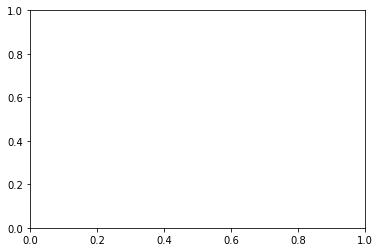

In [ ]:
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling
import matplotlib.pyplot as plt

def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index2word)  # fixed-width numpy strings

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(model)

def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=True):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go

    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')


def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 25 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

try:
    get_ipython()
except Exception:
    plot_function = plot_with_matplotlib


plot_function(x_vals, y_vals, labels)

In [ ]:
model.init_sims()

In [ ]:
y = model.wv.index2word


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X = pca.fit_transform(model.init_sims())


ValueError: ignored

In [ ]:
X.shape

NameError: ignored

In [ ]:
import plotly.express as px
fig = px.scatter_3d(X[200:300],x=0,y=1,z=2, color=y[200:300])
fig.show()

NameError: ignored

### Further Reading

You can read about gensim more at https://radimrehurek.com/gensim/models/word2vec.html

Explore other Datasets related to Amazon Reviews: http://jmcauley.ucsd.edu/data/amazon/

## Exercise

Train a word2vec model on the [Sports & Outdoors Reviews Dataset](http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Sports_and_Outdoors_5.json.gz)
Once you train a model on this, find the words most similar to 'awful' and find similarities between the following word tuples: ('good', 'great'), ('slow','steady')

Click here for [solution](https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/42_word2vec_gensim/42_word2vec_gensim_exercise_solution.ipynb).